In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install transformers

In [3]:
import pandas as pd 
dt = pd.read_csv("amazontrain.csv")
dt[:500]

,Y,text
0,0,This is so embarassing and also my ears hurt i...
1,1,Very good quality though
2,1,This is a great deal.
3,1,Awsome Device Works Great!!.
4,0,"Finally, after three or four times the spring ..."
...,...,...
495,0,Don't make the same mistake that I did and ple...
496,1,Worked very well paired with a Treo 700w and a...
497,0,"But when I check voice mail at night, the keyp..."
498,1,"Great price, too!"


In [4]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokenizer.tokenize("I have a new GPU!")

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

['i', 'have', 'a', 'new', 'gp', '##u', '!']

In [5]:
s_d = []
data = dt["text"]
context = ""
for j in range(len(data)):
  s_d.append(data[j])

In [6]:
tokenized =[]
for i in range(len(s_d)):
  tokenized.append(tokenizer.tokenize(s_d[i]))

In [7]:
tokenized

[['this',
  'is',
  'so',
  'em',
  '##bara',
  '##ssing',
  'and',
  'also',
  'my',
  'ears',
  'hurt',
  'if',
  'i',
  'try',
  'to',
  'push',
  'the',
  'ear',
  'plug',
  'into',
  'my',
  'ear',
  '.'],
 ['very', 'good', 'quality', 'though'],
 ['this', 'is', 'a', 'great', 'deal', '.'],
 ['aw', '##some', 'device', 'works', 'great', '!', '!', '.'],
 ['finally',
  ',',
  'after',
  'three',
  'or',
  'four',
  'times',
  'the',
  'spring',
  'of',
  'the',
  'latch',
  'broke',
  'and',
  'i',
  'could',
  'not',
  'use',
  'it',
  'any',
  'longer',
  'on',
  'the',
  'vis',
  '##or',
  '.'],
 ['worth', '##while', '.'],
 ['the',
  'sound',
  'is',
  'clear',
  'and',
  'the',
  'people',
  'i',
  'talk',
  'to',
  'on',
  'it',
  'are',
  'amazed',
  'at',
  'the',
  'quality',
  'too',
  '.'],
 ['if',
  'you',
  'plan',
  'to',
  'use',
  'this',
  'in',
  'a',
  'car',
  'forget',
  'about',
  'it',
  '.'],
 ['don', "'", 't', 'buy', 'this', 'product', '.'],
 ['internet', 'is', 

In [8]:
from gensim.models import Word2Vec  

In [9]:
model = Word2Vec(tokenized, min_count=1)
print(model)

Word2Vec(vocab=1715, size=100, alpha=0.025)


In [10]:
words = list(model.wv.vocab)
print(words[0:5])

['this', 'is', 'so', 'em', '##bara']


In [13]:
print(model['product'])

[-0.04321914  0.00334693  0.05615276 -0.07550173  0.02379028 -0.03457117
 -0.08875977  0.06727741  0.0436169   0.04750717 -0.0280771  -0.01694077
  0.14835806 -0.02013141  0.05226268  0.04422976 -0.00059348 -0.04245947
 -0.02584002 -0.08565256  0.08865143  0.04260768 -0.00842834 -0.03720649
  0.02834934 -0.02199666 -0.10847189  0.10792892  0.04882882 -0.10444827
 -0.08871355  0.03882593  0.01450464  0.03074375  0.00059606 -0.05573022
  0.09745736 -0.16292916 -0.00878519  0.02780155  0.00207241  0.02763338
 -0.16416319  0.06926289  0.12264691 -0.02335892  0.03035956 -0.06621363
  0.04145899 -0.05288395  0.04328116  0.01872669  0.01176799  0.0507611
  0.04978342  0.04568684  0.02566188 -0.00645484 -0.00810557 -0.16519214
 -0.02553266  0.09989227  0.10328531  0.03247568 -0.00280572 -0.00627474
  0.01661282  0.01614103 -0.01820512  0.06392978  0.09356713 -0.06080234
 -0.00796803  0.06930095 -0.04359    -0.01132674  0.06395695 -0.08390492
 -0.12553741  0.02679266 -0.06711801  0.10771503  0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [14]:
X = model[model.wv.vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [15]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(60, 60)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig("pic.jpg")
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


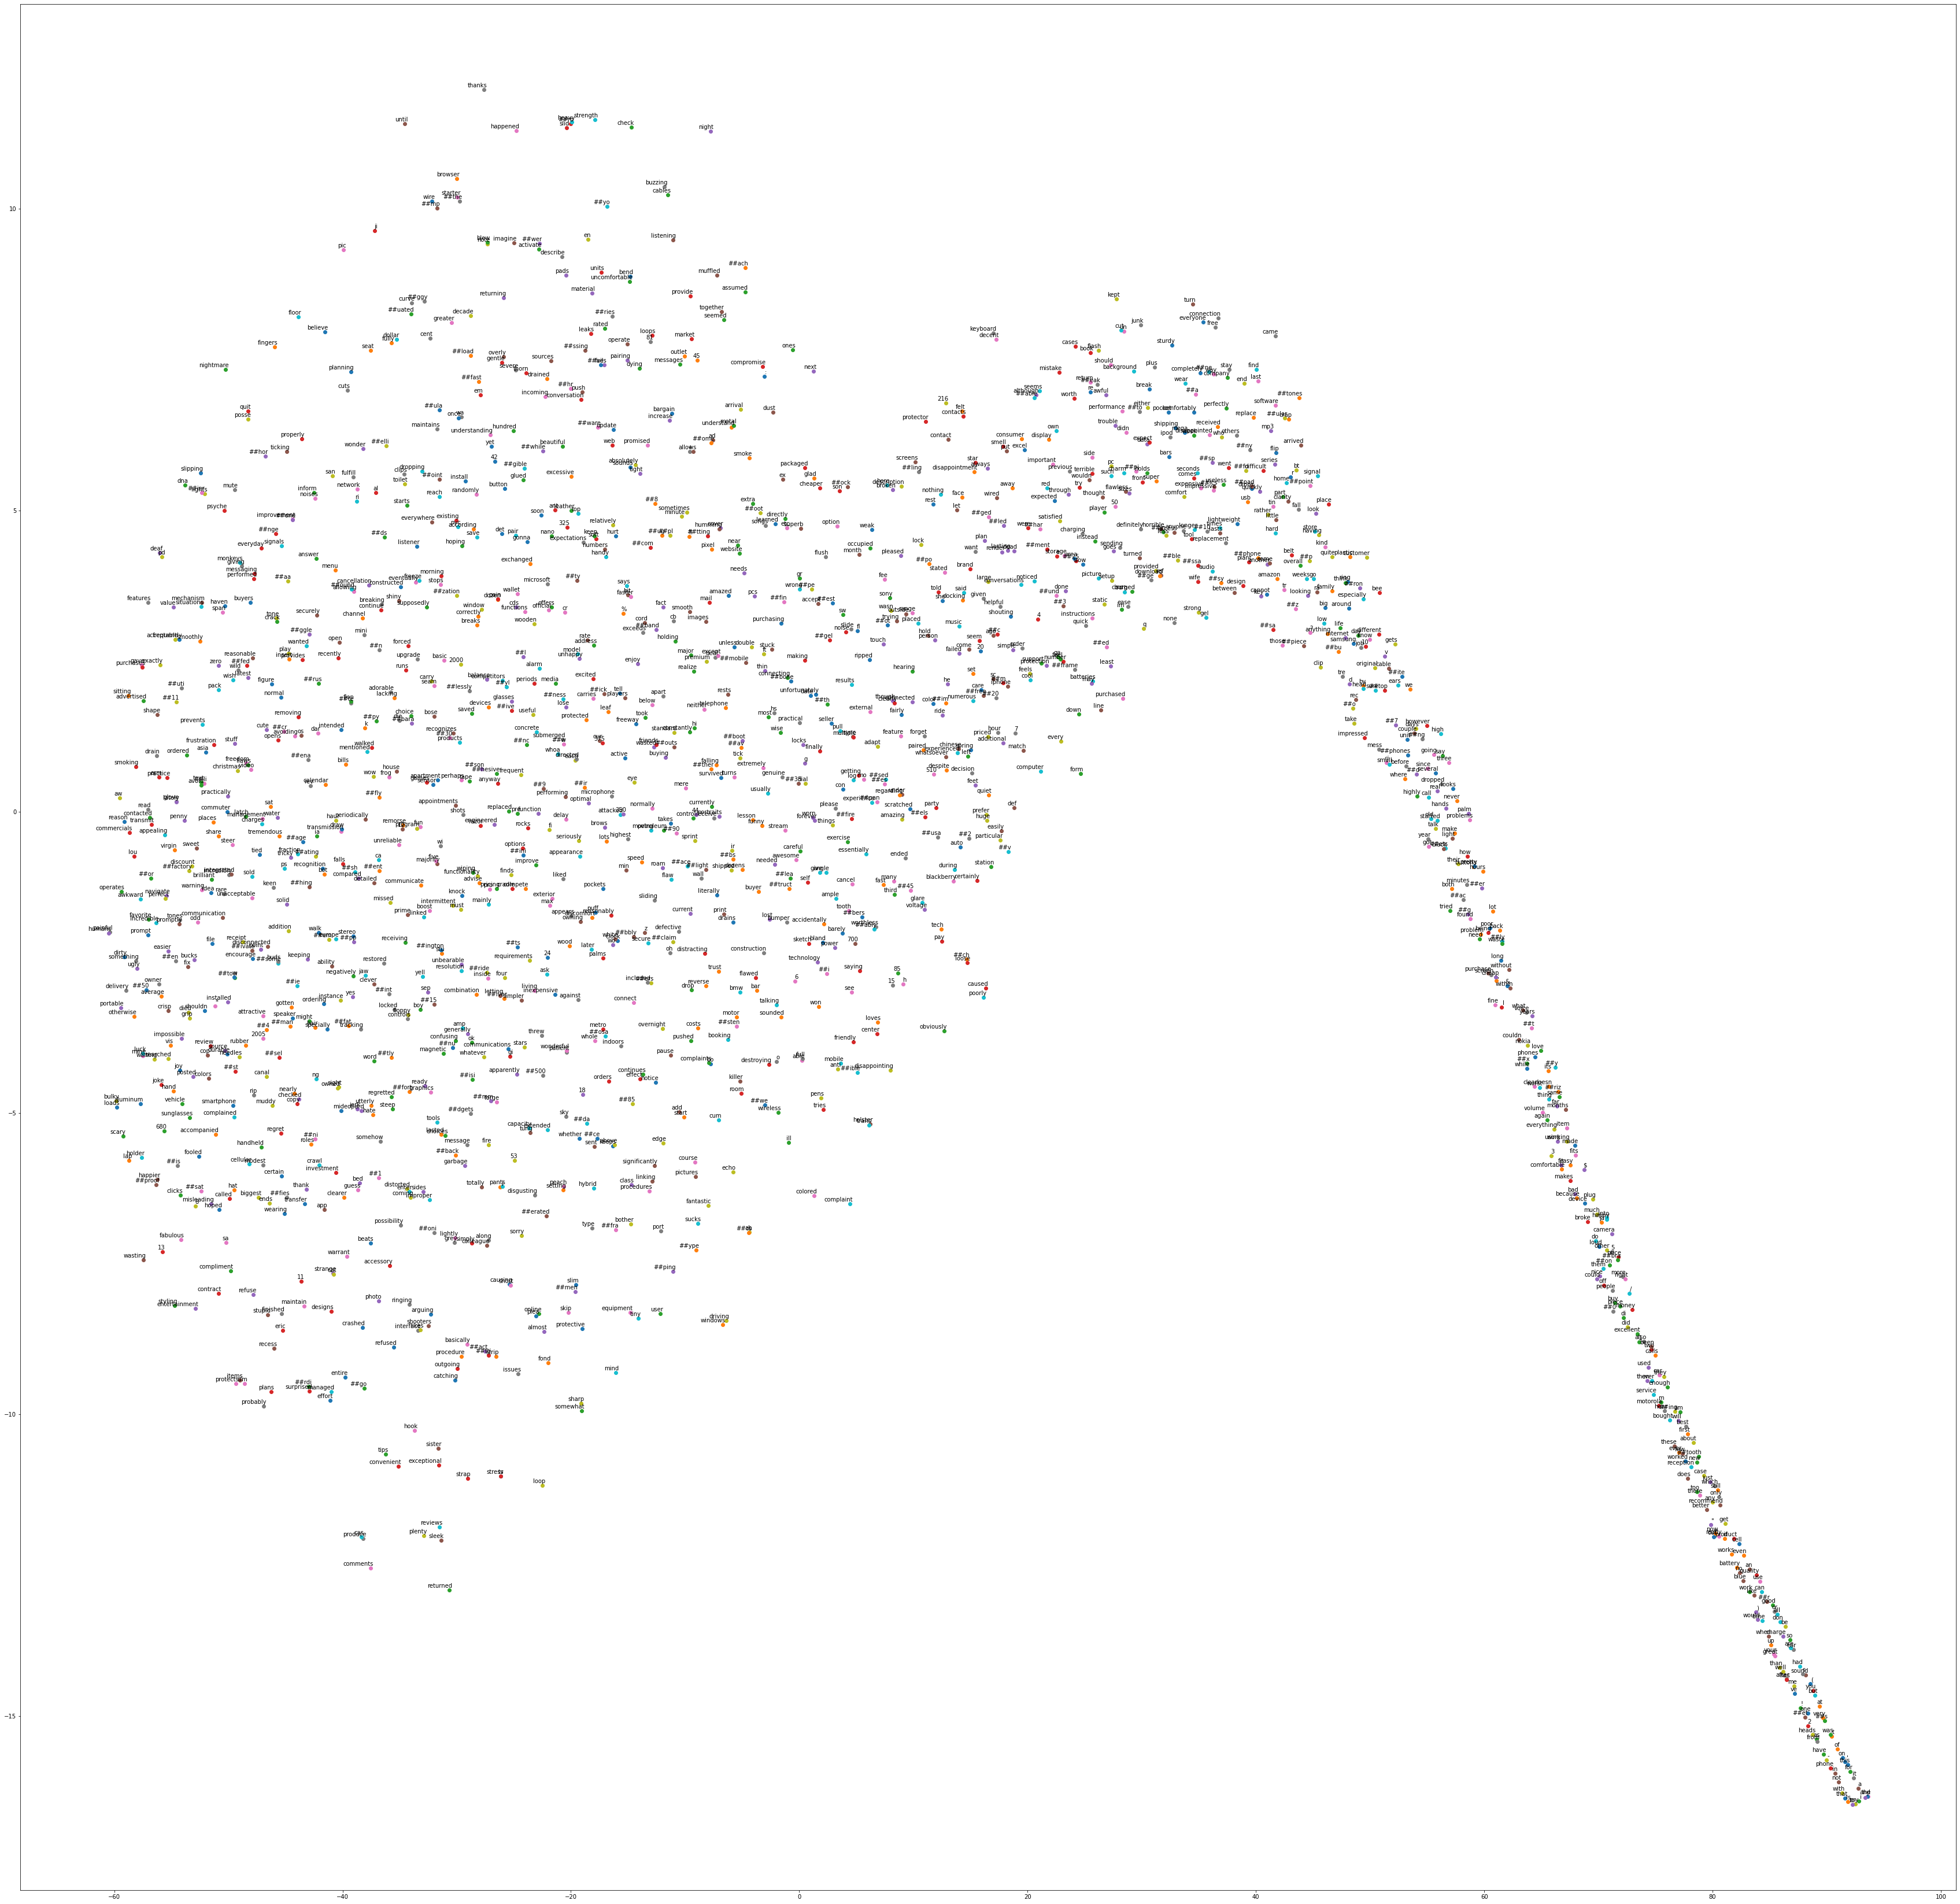

In [16]:
tsne_plot(model)